In [90]:
import pandas as pd
hiking = pd.read_json('data\hiking.json')
hiking.head()

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


In [91]:
hiking['Length'] = hiking['Length'].astype('string')
hiking['Length'].dtypes
hiking['Length'].unique()

<StringArray>
[ '0.8 miles',   '1.0 mile', '0.75 miles',  '0.5 miles',    'Various',
  '1.7 miles',  '2.4 miles',  '3.0 miles', '12.3 miles', '0.85 miles',
  '4.0 miles',  '7.6 miles',  '8.0 miles', '0.25 miles',  '1.4 miles',
 '1.25 miles',  '1.5 miles',   '1.1 mile',  '1.2 miles',         <NA>]
Length: 20, dtype: string

In [92]:
hiking['Length'] = hiking['Length'].str.strip(' miles')
hiking['Length'] = hiking['Length'].str.strip(' mile')
hiking['Length'] = hiking['Length'].str.replace('Variou', '0.0')
hiking['Length'] = hiking['Length'].fillna('0.0')
hiking['Length'].unique()
hiking['Length'] = hiking['Length'].astype('float')
group_name = ['lower', 'upper']
hiking['group_quantile2'] = pd.qcut(hiking['Length'], q=2, labels =group_name)

In [40]:
wine = pd.read_csv('data\wine_types.csv')

In [13]:
wine.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [94]:
pd.crosstab(hiking["Difficulty"], hiking["group_quantile2"])

group_quantile2,lower,upper
Difficulty,,
,1,1
Easy,8,4
Easy,0,1
Easy/Moderate,1,5
Moderate,2,1
Moderate/Difficult,0,2
Various,1,0


In [95]:
pd.crosstab(hiking["Difficulty"], hiking["group_quantile2"],
            values=hiking["Length"], aggfunc="mean")

group_quantile2,lower,upper
Difficulty,,
,1.0000,1.7000
Easy,0.6375,1.7375
Easy,NaN,1.5000
Easy/Moderate,1.1000,8.7600
Moderate,0.3750,1.5000
Moderate/Difficult,NaN,4.7000
Various,0.0000,NaN


# 1. Removing missing data

In [322]:
import numpy as np
df =pd.DataFrame({
    'A': [1,4,7, np.nan, 5],
    'B': [np.nan, 7, np.nan, 7, 9],
    'C': [2,3, np.nan, np.nan, 7]
})
df

,A,B,C
0,1.0,NaN,2.0
1,4.0,7.0,3.0
2,7.0,NaN,NaN
3,NaN,7.0,NaN
4,5.0,9.0,7.0


In [23]:
# we can drop when isna is 5% or less
df.dropna()

,A,B,C
1,4.0,7.0,3.0
4,5.0,9.0,7.0


In [24]:
df.drop([1,2,3])

,A,B,C
0,1.0,NaN,2.0
4,5.0,9.0,7.0


In [26]:
df.drop("A", axis = 1)
# df.drop(["A","B"] axis = 1)

,B,C
0,NaN,2.0
1,7.0,3.0
2,NaN,NaN
3,7.0,NaN
4,9.0,7.0


In [27]:
df.isna().sum()

A    1
B    2
C    2
dtype: int64

In [29]:
# remove the row with nan from sepcific column
df.dropna(subset = ["B"])

,A,B,C
1,4.0,7.0,3.0
3,NaN,7.0,NaN
4,5.0,9.0,7.0


In [30]:
# how many nan missing values
df.dropna(thresh =2)

,A,B,C
0,1.0,NaN,2.0
1,4.0,7.0,3.0
4,5.0,9.0,7.0


In [329]:
import numpy as np
df16 =pd.DataFrame({
    'A': [-1,4,-5,3,4,5,6,-4,-6],
    'B': [np.nan, 7, np.nan, 7, 9,4,5,np.nan, np.nan]
})
df16

,A,B
0,-1,NaN
1,4,7.0
2,-5,NaN
3,3,7.0
4,4,9.0
5,5,4.0
6,6,5.0
7,-4,NaN
8,-6,NaN


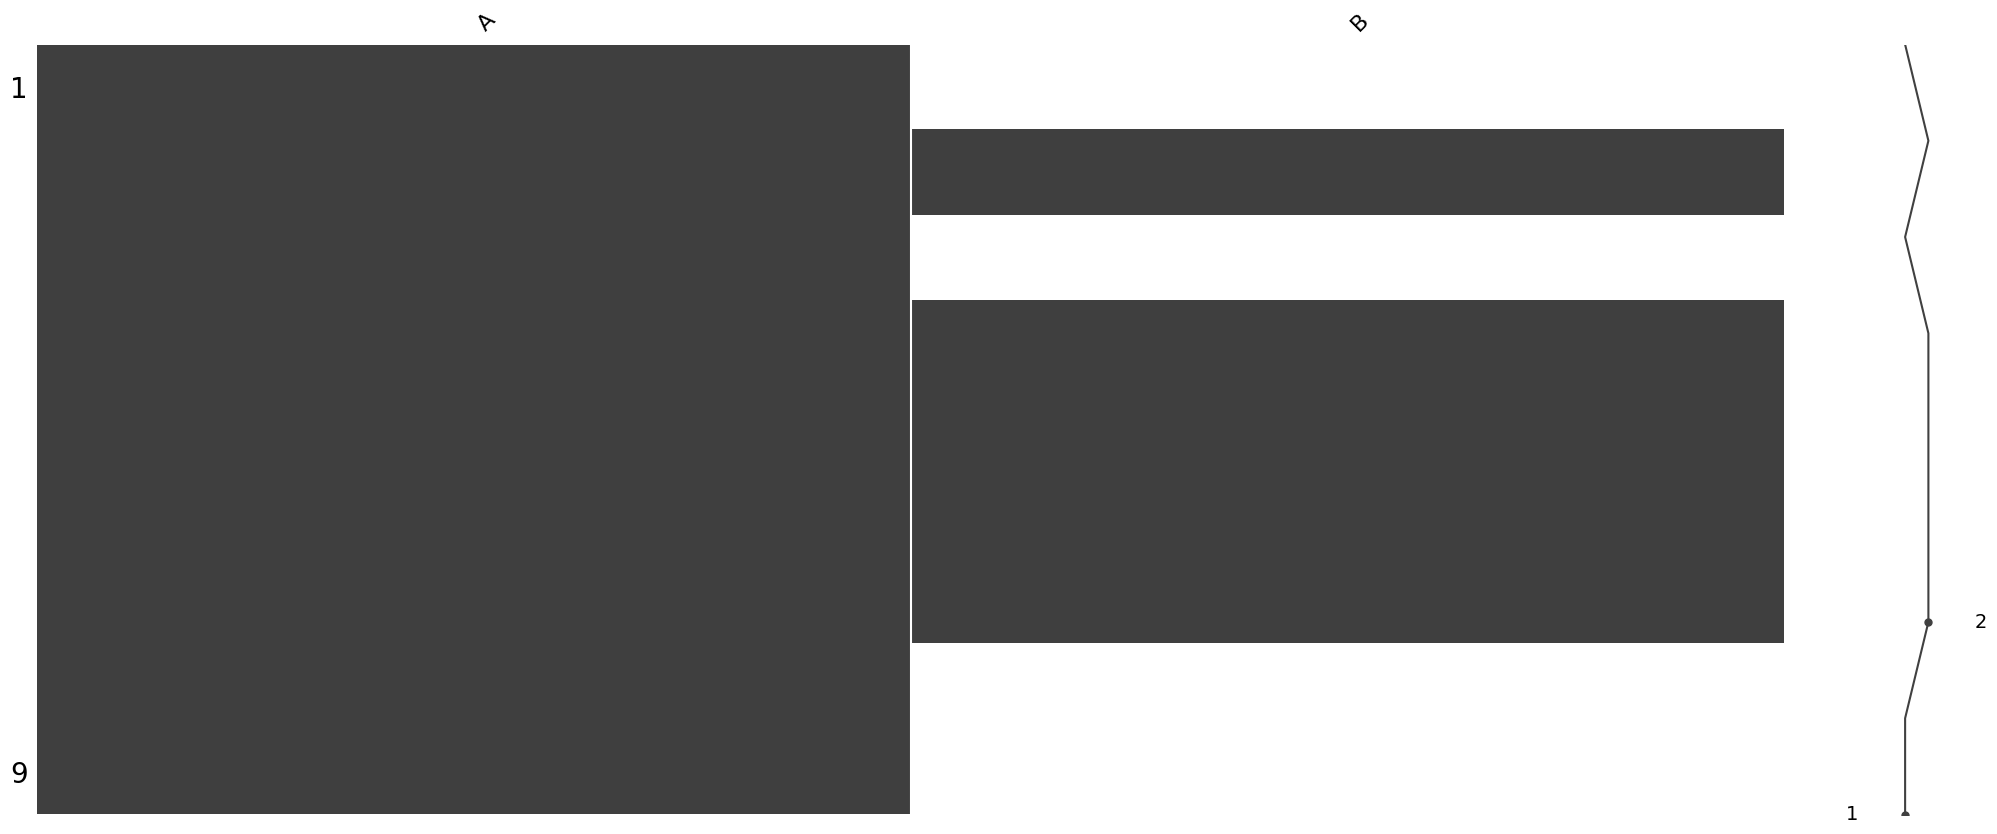

In [330]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df16)
plt.show()

In [334]:
missing =df16[df16['B'].isna()]
complete = df16[~df16['B'].isna()]

In [335]:
missing.describe()

,A,B
count,4.000000,0.0
mean,-4.000000,NaN
std,2.160247,NaN
min,-6.000000,NaN
25%,-5.250000,NaN
50%,-4.500000,NaN
75%,-3.250000,NaN
max,-1.000000,NaN


In [336]:
complete.describe()

,A,B
count,5.000000,5.000000
mean,4.400000,6.400000
std,1.140175,1.949359
min,3.000000,4.000000
25%,4.000000,5.000000
50%,4.000000,7.000000
75%,5.000000,7.000000
max,6.000000,9.000000


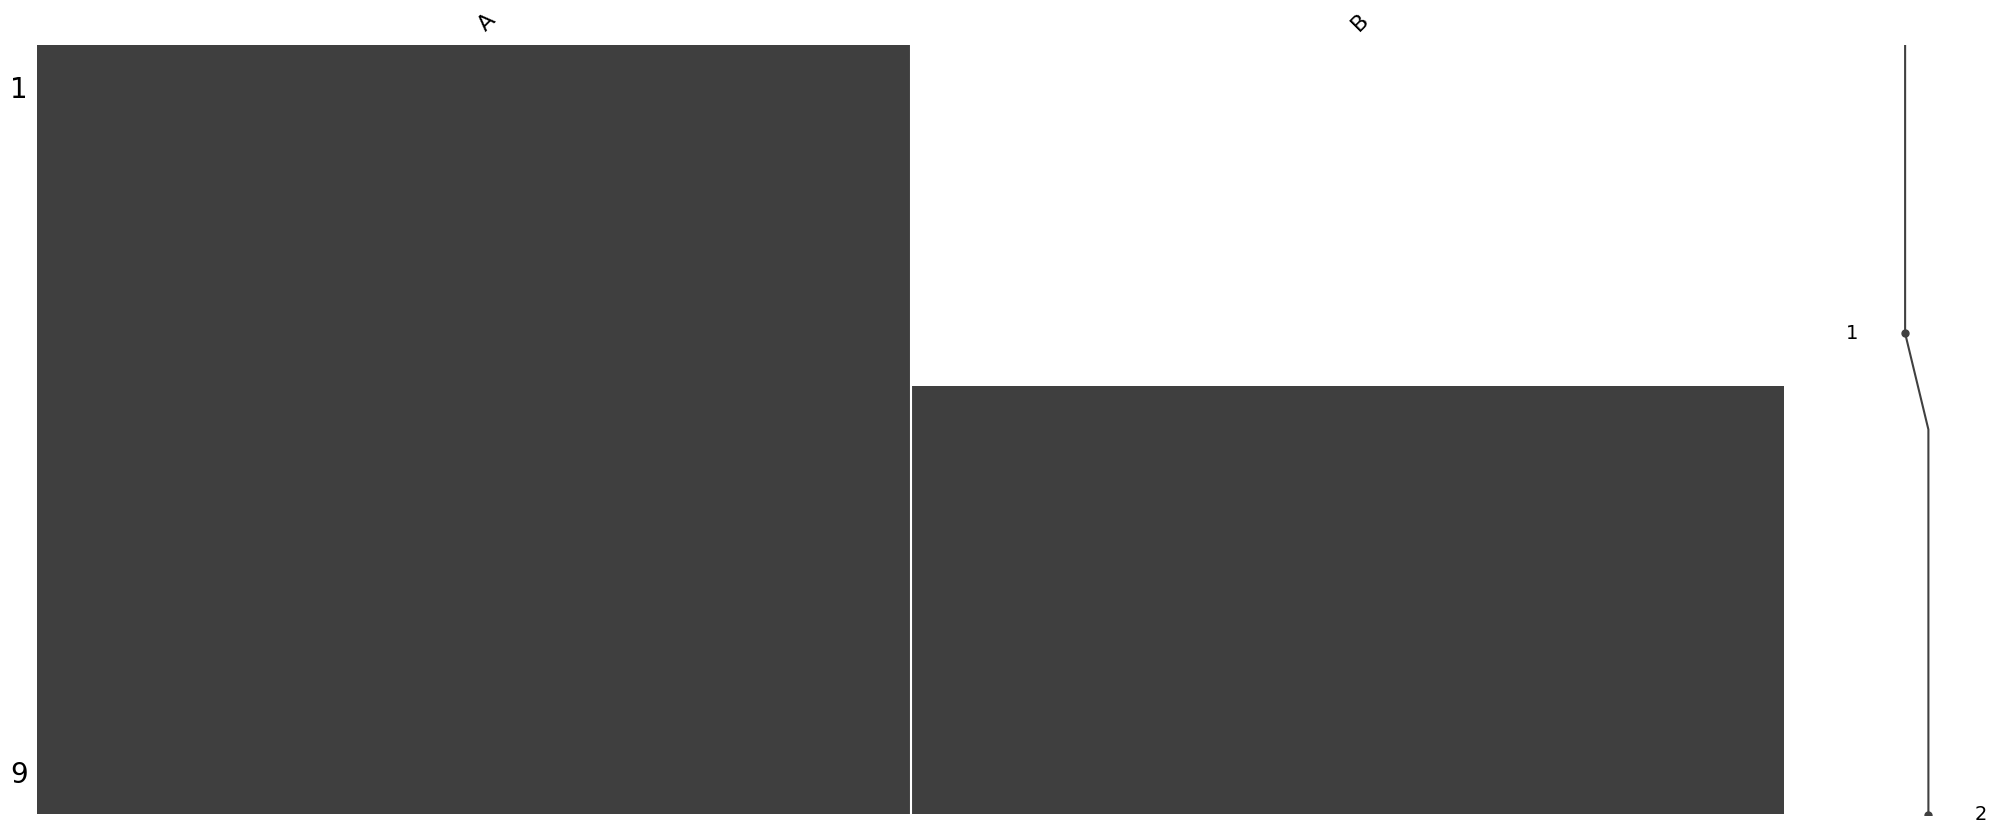

In [339]:
sorted_B = df16.sort_values(by='A')
msno.matrix(sorted_B)
plt.show()
# for negative values from column 'A' - missing in column 'B'

In [344]:
imputed = df16.fillna({'B':0})
imputed

,A,B
0,-1,0.0
1,4,7.0
2,-5,0.0
3,3,7.0
4,4,9.0
5,5,4.0
6,6,5.0
7,-4,0.0
8,-6,0.0


# 2. Data types

In [37]:
volunteer = pd.read_csv('data/volunteer_opportunities.csv')

In [38]:
volunteer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      665 non-null    int64  
 1   content_id          665 non-null    int64  
 2   vol_requests        665 non-null    int64  
 3   event_time          665 non-null    int64  
 4   title               665 non-null    object 
 5   hits                665 non-null    int64  
 6   summary             665 non-null    object 
 7   is_priority         62 non-null     object 
 8   category_id         617 non-null    float64
 9   category_desc       617 non-null    object 
 10  amsl                0 non-null      float64
 11  amsl_unit           0 non-null      float64
 12  org_title           665 non-null    object 
 13  org_content_id      665 non-null    int64  
 14  addresses_count     665 non-null    int64  
 15  locality            595 non-null    object 
 16  region  

In [135]:
df2 =pd.DataFrame({
    'A': [1,2,3],
    'B': ['string', 'string2', 'string3'],
    'C': [1.0, 2.0, '3.0'],
    'Revenu': ['2$', '3$', '4$'],
    'Marriage_status': [1,2,3]
})
df2
# 1 - married, 2- single, 3- divorced

,A,B,C,Revenu,Marriage_status
0,1,string,1.0,2$,1
1,2,string2,2.0,3$,2
2,3,string3,3.0,4$,3


In [136]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A                3 non-null      int64 
 1   B                3 non-null      object
 2   C                3 non-null      object
 3   Revenu           3 non-null      object
 4   Marriage_status  3 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 252.0+ bytes


In [137]:
df2['C'] =df2['C'].astype("float")

In [138]:
df2['Revenu'].sum()

'2$3$4$'

In [139]:
df2['Revenu'] = df2['Revenu'].str.strip('$')
df2['Revenu'] =df2['Revenu'].astype("int")
df2['Revenu'].sum()

9

In [140]:
# Verify the revenu is now an intiger
assert df2['Revenu'].dtype == 'int'
# returns nothing if condition is met, an error if it not

In [141]:
assert 1+2 == 4

AssertionError: 

In [142]:
# for categorical values which looks like numeric
df2['Marriage_status'] =df2['Marriage_status'].astype("category")

In [143]:
df2.dtypes

A                     int64
B                    object
C                   float64
Revenu                int32
Marriage_status    category
dtype: object

In [575]:
df2.select_dtypes('object').head()
# filter any non-numeric data

,B
0,string
1,string2
2,string3


In [578]:
# unique - shows the exact unique values, nunique - counts how many of them there is
df2['B'].nunique()

3

In [579]:
# pandas.Series.str.contains()
# allows to look for specific string or multiple strings
df2['B'].str.contains('2')

0    False
1     True
2    False
Name: B, dtype: bool

In [580]:
df2['B'].str.contains('2|3')
#\ = or

0    False
1     True
2     True
Name: B, dtype: bool

In [581]:
# any taht starts with str
df2['B'].str.contains('^str')

0    True
1    True
2    True
Name: B, dtype: bool

In [588]:
df20 =pd.DataFrame({
    'job': ['Scientis', 'NLP', 'Analyst', 'Data Analyst', 'Analytics go', 'Analytics go','NLP']
})
df20

,job
0,Scientis
1,NLP
2,Analyst
3,Data Analyst
4,Analytics go
5,Analytics go
6,NLP


In [589]:
# Filter the DataFrame for object columns
non_numeric = df20.select_dtypes('object')

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in job column:  5


In [590]:
job_categories = ['Data Scientis', 'Data Analytics']
data_scientis = 'Data Scientis|NLP'
data_analytics = 'Analyst|Analytics'
conditions = [
    (df20['job'].str.contains(data_scientis)),
    (df20['job'].str.contains(data_analytics))
]
# np.select(list of conditions, where to look in, default if not finded then names Other)
df20['job_category'] = np.select(conditions, job_categories, default = 'Other')
df20

,job,job_category
0,Scientis,Other
1,NLP,Data Scientis
2,Analyst,Data Analytics
3,Data Analyst,Data Analytics
4,Analytics go,Data Analytics
5,Analytics go,Data Analytics
6,NLP,Data Scientis


<Axes: xlabel='job_category', ylabel='count'>

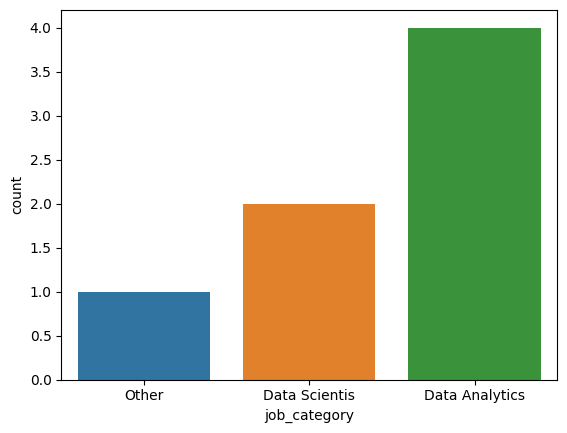

In [591]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = df20, x = 'job_category')

# 3. Data range constraints

In [169]:
df8 =pd.DataFrame({
    'A': [1,2,3,4,8,6,5,3,2,4,5,7],
    'B': ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12']
})
df8

,A,B
0,1,s1
1,2,s2
2,3,s3
3,4,s4
4,8,s5
5,6,s6
6,5,s7
7,3,s8
8,2,s9
9,4,s10


In [156]:
# max A =5
df8[df8['A']>5]

,A,B
4,8,s5
5,6,s6
11,7,s12


In [159]:
# drop values using filters
df8_new1 = df8[df8['A']<=5]
df8_new1

,A,B
0,1,s1
1,2,s2
2,3,s3
3,4,s4
6,5,s7
7,3,s8
8,2,s9
9,4,s10
10,5,s11


In [167]:
# drop values using drop
df8.drop(df8[df8['A']>5].index, inplace = True)
df8

,A,B
0,1,s1
1,2,s2
2,3,s3
3,4,s4
6,5,s7
7,3,s8
8,2,s9
9,4,s10
10,5,s11


In [168]:
# Assert result
assert df8['A'].max() <=5

In [172]:
# convert df8['A']>5 to 5
# loc[row index, the column index]
df8.loc[df8['A']>5,'A'] = 5
df8

,A,B
0,1,s1
1,2,s2
2,3,s3
3,4,s4
4,5,s5
5,5,s6
6,5,s7
7,3,s8
8,2,s9
9,4,s10


In [173]:
df9 =pd.DataFrame({
    'date': ['July 30 2011', 'February 28 2011', 'January 30 2011', 'March 30 2011',],
    'purchase': [1,2,3,4]
})
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      4 non-null      object
 1   purchase  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [174]:
import datetime as dt
today = dt.date.today()
today

datetime.date(2024, 6, 7)

In [184]:
# convaert to date
# first converting it into a pandas datetime object with the pd.to_datetime 
# then need to convert the datetime object into a date. This conversion is done by appending dt.date to the code 
df9['date_converte'] = pd.to_datetime(df9['date']).dt.date
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4 non-null      object
 1   purchase       4 non-null      int64 
 2   date_converte  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes


In [185]:
df9[df9['date_converte']< dt.date.today()]

,date,purchase,date_converte
0,July 30 2011,1,2011-07-30
1,February 28 2011,2,2011-02-28
2,January 30 2011,3,2011-01-30
3,March 30 2011,4,2011-03-30


### a Importing with correct format

In [4]:
import pandas as pd
divorce = pd.read_csv('data/divorce.csv', parse_dates = ['marriage_date'])
divorce.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [ ]:
# changing the format after read csv
# divorce['marriage_date'] = pd.to_datetime(divorce['marriage_date'])

In [7]:
divorce2 =pd.DataFrame({
    'month': [1,2,3,1,1],
    'day': [14,15,4,23,9],
    'year': [1994,1998,2005,2012,2001],
    'duration': [10,9,5,6,13]})
divorce2

,month,day,year,duration
0,1,14,1994,10
1,2,15,1998,9
2,3,4,2005,5
3,1,23,2012,6
4,1,9,2001,13


In [8]:
divorce2['marriage_date'] = pd.to_datetime(divorce2[['month', 'day', 'year']])
divorce2

,month,day,year,duration,marriage_date
0,1,14,1994,10,1994-01-14
1,2,15,1998,9,1998-02-15
2,3,4,2005,5,2005-03-04
3,1,23,2012,6,2012-01-23
4,1,9,2001,13,2001-01-09


In [26]:
divorce['month'] = pd.to_datetime(divorce['marriage_date']).dt.month
divorce['year'] = pd.to_datetime(divorce['marriage_date']).dt.year
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,month,year
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6,2000
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9,2001
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2,2000
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5,2006
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8,2007


<Axes: xlabel='month', ylabel='marriage_date'>

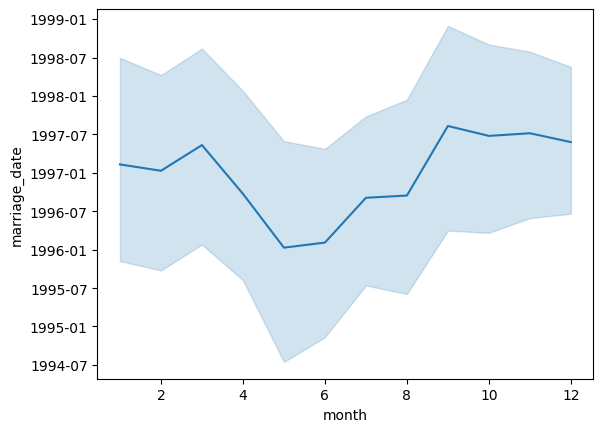

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data = divorce, x = 'month', y = 'marriage_date')
# confidence intervals in the lighter blue shading indicate the area that
# with 95% probability, the population mean duration could fall between

### b correlation
- it is importent to remember that the marriage strated ealier can have automatily longer duration
- pearson corelation it is only linear

C:\Users\AsusF512ua-ej269t\AppData\Local\Temp\ipykernel_17600\2146609230.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(divorce.corr(), annot= True)


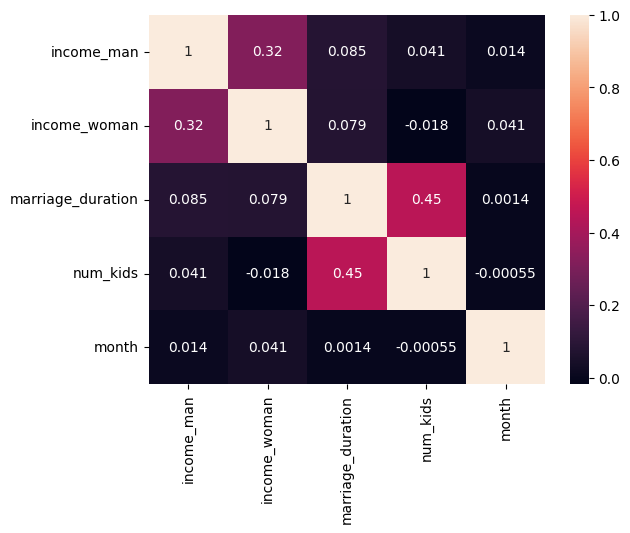

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(divorce.corr(), annot= True)
plt.show()
# Setting the annot argument to True labels the correlation coefficient inside each cell

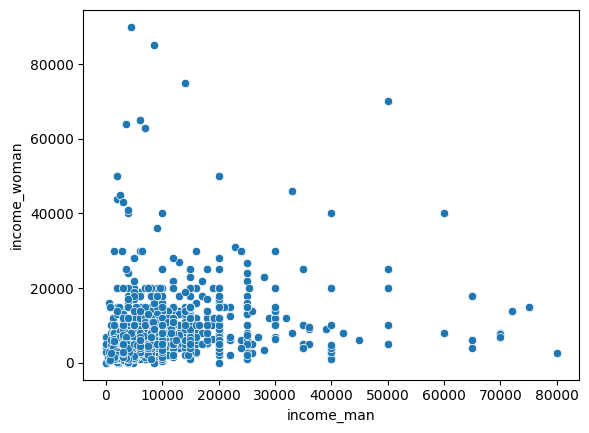

In [15]:
sns.scatterplot(data = divorce, x = 'income_man', y = 'income_woman')
plt.show()

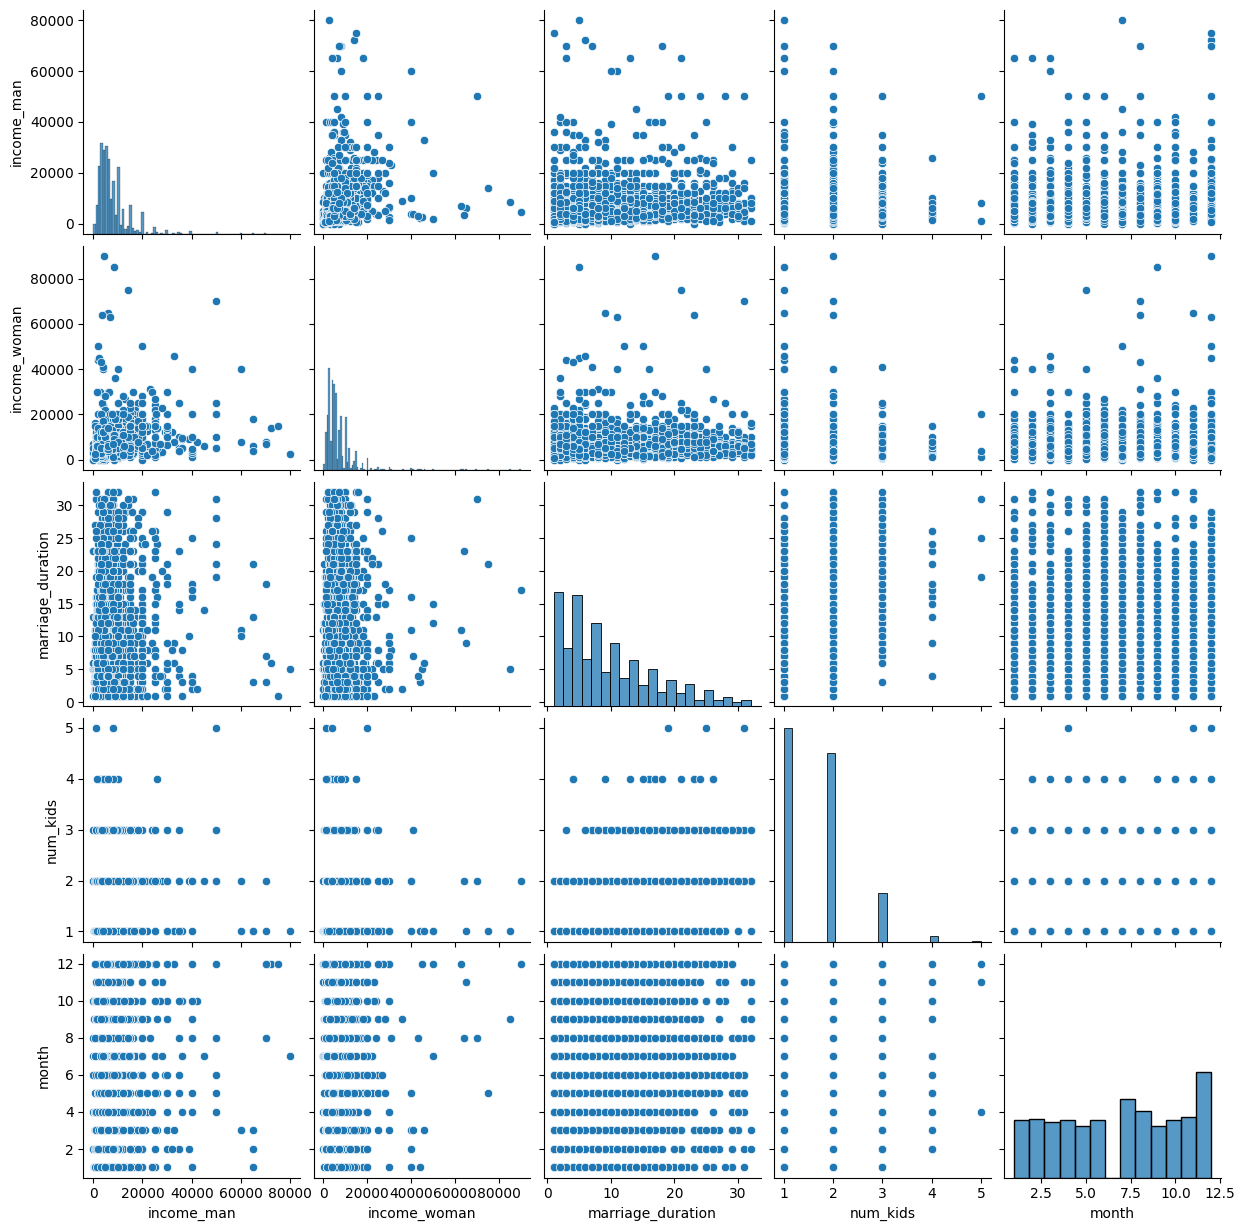

In [16]:
sns.pairplot(data = divorce)
plt.show()

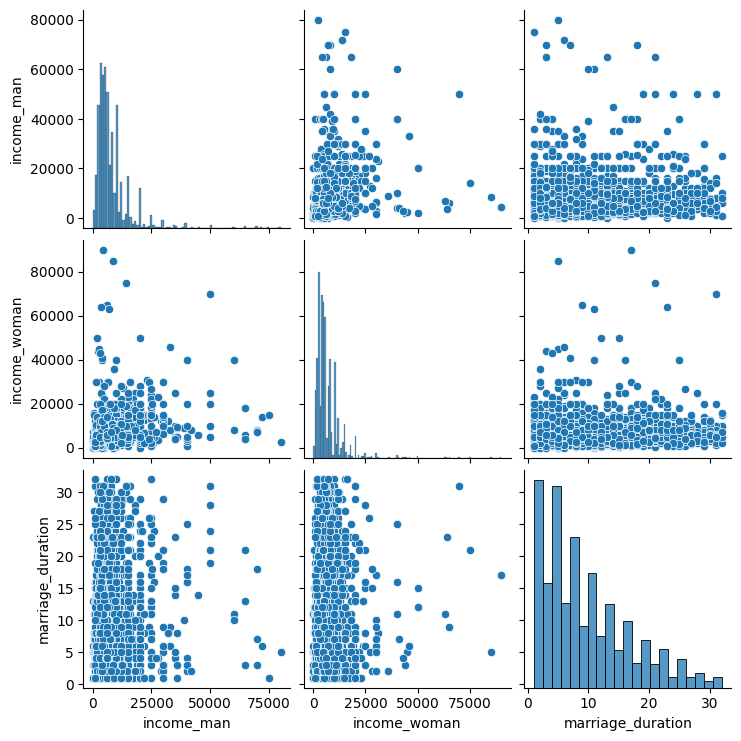

In [17]:
sns.pairplot(data = divorce, vars = ['income_man','income_woman', 'marriage_duration'])
plt.show()

In [18]:
divorce['education_man'].value_counts()

Professional    1313
Preparatory      501
Secondary        288
Primary          100
None               4
Other              3
Name: education_man, dtype: int64

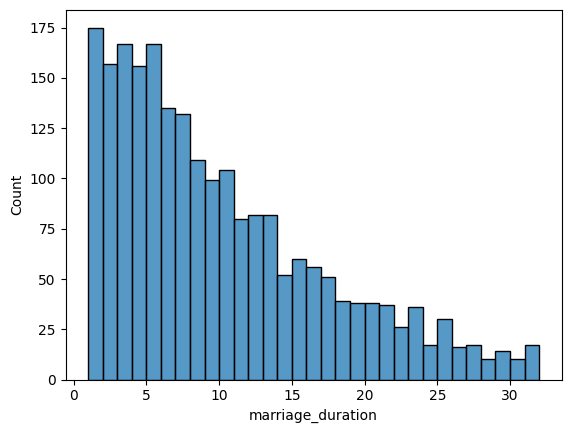

In [19]:
sns.histplot(data = divorce, x= 'marriage_duration', binwidth = 1)
plt.show()

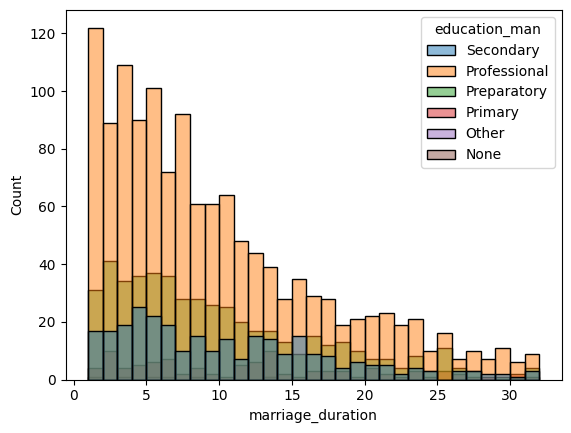

In [20]:
sns.histplot(data = divorce, x= 'marriage_duration', binwidth = 1, hue='education_man')
plt.show()

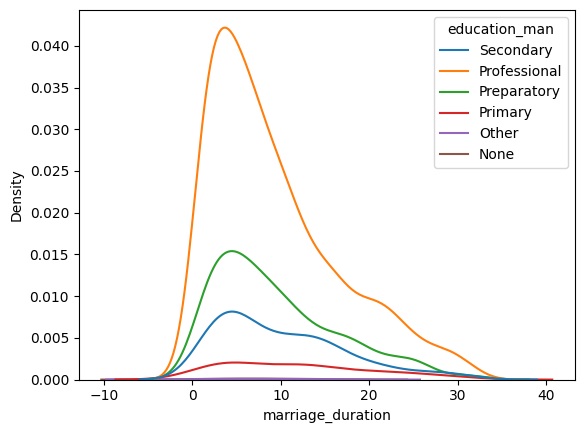

In [21]:
sns.kdeplot(data = divorce, x= 'marriage_duration', hue='education_man')
plt.show()
# issue - shows the marriage_duraation less than 0 years

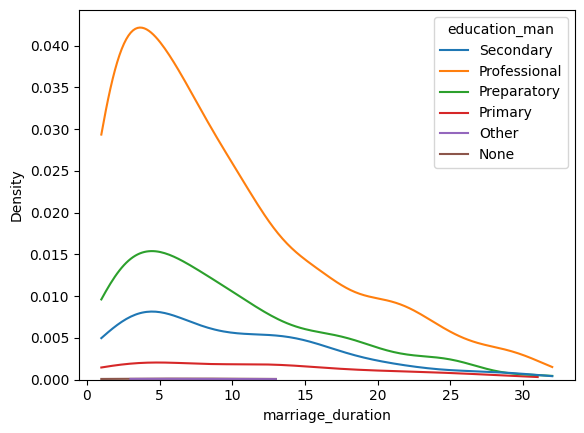

In [22]:
# fixing
sns.kdeplot(data = divorce, x= 'marriage_duration', hue='education_man', cut = 0)
plt.show()

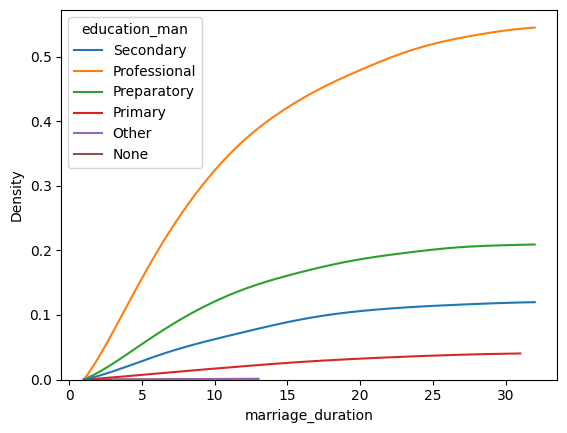

In [24]:
# cumulative distribution
sns.kdeplot(data = divorce, x= 'marriage_duration', hue='education_man', cut = 0, cumulative = True)
plt.show()
# the probability that marriage duration is less than or equal to the value on the x-axis for each level of male partner education

In [33]:
divorce['dob_man'] = pd.to_datetime(divorce['dob_man'])
divorce['dob_woman'] = pd.to_datetime(divorce['dob_woman'])

divorce['man_age_married']= divorce['year'] - divorce['dob_man'].dt.year
divorce['woman_age_married']= divorce['year'] - divorce['dob_woman'].dt.year

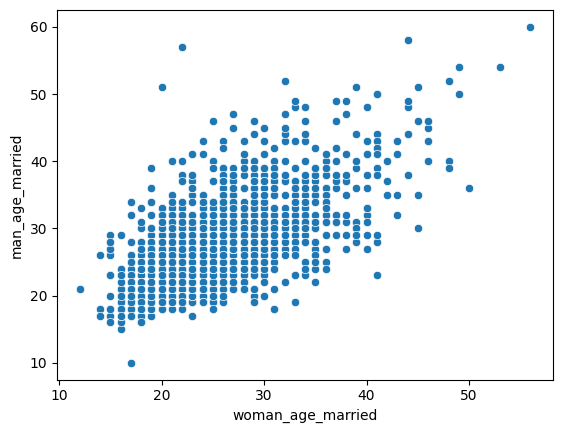

In [34]:
sns.scatterplot(data = divorce, x ='woman_age_married', y = 'man_age_married' )
plt.show()

In [37]:
divorce[['woman_age_married', 'man_age_married']].corr()

,woman_age_married,man_age_married
woman_age_married,1.000000,0.669389
man_age_married,0.669389,1.000000


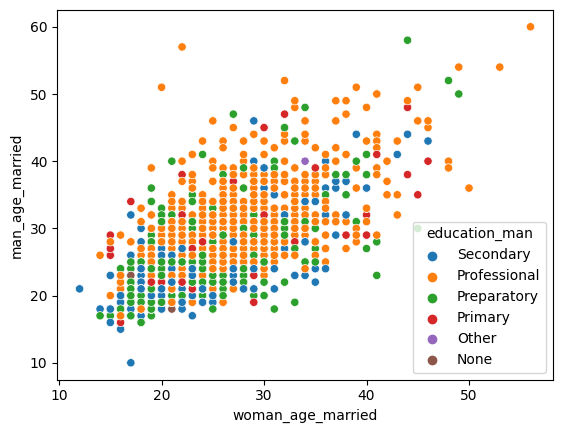

In [38]:
sns.scatterplot(data = divorce, x ='woman_age_married', y = 'man_age_married', hue = 'education_man')
plt.show()

# 4. Uniqueness constraints - duplicates

In [207]:
df10 =pd.DataFrame({
    'A': [1,2,3,1,1],
    'B': ['string', 'string2', 'string2','string', "string2"],
    'C': [1.0, 2.0, '3.0', 1.0, 2],
    'Revenu': ['2$', '2$', '3$', '2$','2$'],
    'Marriage_status': [1,2,3,1,2]
})
df10

,A,B,C,Revenu,Marriage_status
0,1,string,1.0,2$,1
1,2,string2,2.0,2$,2
2,3,string2,3.0,3$,3
3,1,string,1.0,2$,1
4,1,string2,2,2$,2


In [208]:
# all the columns are required to have duplicate values by default, 
# with all duplicate values being marked as True except for the first occurrence
duplicates = df10.duplicated()
df10[duplicates]

,A,B,C,Revenu,Marriage_status
3,1,string,1.0,2$,1


In [209]:
# subset - lets us set a list of column names to check for duplication. subset = ['first_name', 'last_name']
# keep - lets us keep the first occurrence of a duplicate value 'first','last', False. 
duplicates2 = df10.duplicated(subset = ['Revenu'], keep = False)
df10[duplicates2]

,A,B,C,Revenu,Marriage_status
0,1,string,1.0,2$,1
1,2,string2,2.0,2$,2
3,1,string,1.0,2$,1
4,1,string2,2,2$,2


In [210]:
df10[duplicates2].sort_values(by = 'Marriage_status')

,A,B,C,Revenu,Marriage_status
0,1,string,1.0,2$,1
3,1,string,1.0,2$,1
1,2,string2,2.0,2$,2
4,1,string2,2,2$,2


In [211]:
#. drop_duplicates()
# subset
# keep
# inplace - drops the duplicated values directly inside the df
df10.drop_duplicates(inplace=True)
df10

,A,B,C,Revenu,Marriage_status
0,1,string,1.0,2$,1
1,2,string2,2.0,2$,2
2,3,string2,3.0,3$,3
4,1,string2,2,2$,2


### How to treat
- groupby()
- agg()

In [212]:
# column_name = ['first_name', 'second_name', 'address']
# summaries = {'height': 'max', 'weight': 'mean'}
# height_weight = height_weight.groupby(column_name).agg(summaries).reset_index()

In [214]:
column_name = ['B']
summaries = {'Marriage_status': 'min', 'A': 'mean'}
df10_treated = df10.groupby(column_name).agg(summaries).reset_index()
df10_treated
# f = nobel.groupby('decade', as_index=False).mean('USA') - if numbers and we dont want to make it index

,B,Marriage_status,A
0,string,1,1.0
1,string2,2,2.0


In [543]:
treated = df10_treated['A'].values[1] # index 1
treated

2.0

In [551]:
list_of_Marriage_status = df10_treated['Marriage_status'].values.tolist()
list_of_Marriage_status

[1, 2]

In [362]:
df10_treated_named = df10.groupby(['B']).agg(min_Marriage_status=('Marriage_status', 'min'), 
                               mean_A=('A', 'mean')).reset_index()
df10_treated_named

,B,min_Marriage_status,mean_A
0,string,1,1.0
1,string2,2,2.0


In [217]:
# Make sure aggregatio is done
duplicates3 = df10_treated.duplicated(subset = column_name, keep = False)
df10_treated[duplicates3].sort_values(by = 'B')

,B,Marriage_status,A


# 5. Categorical variables

In [228]:
df11 =pd.DataFrame({
    'Name': ['Anna', 'Jan', 'Pawel','Emil', "Klaudia"],
    'Blood': ['A+', 'B+', 'Z+','AB-', "B-"],
    'C': ['String', 'string2', 'string2 ','string', "string2"],
    'Revenu': ['2$', '2$', '3$', '2$','2$'],
    'Marriage_status': [1,2,3,1,2]
})
df11

,Name,Blood,C,Revenu,Marriage_status
0,Anna,A+,String,2$,1
1,Jan,B+,string2,2$,2
2,Pawel,Z+,string2,3$,3
3,Emil,AB-,string,2$,1
4,Klaudia,B-,string2,2$,2


In [222]:
blood_type =pd.DataFrame({
    'bt': ['A+', 'A-', 'B+','B-', "AB-", "AB+"]
})
blood_type

,bt
0,A+
1,A-
2,B+
3,B-
4,AB-
5,AB+


In [223]:
# set stores unique values
inconsistent_categories= set(df11['Blood']).difference(blood_type['bt'])
inconsistent_categories

{'Z+'}

In [225]:
inconsistent_rows=df11['Blood'].isin(inconsistent_categories)
inconsistent_rows

0    False
1    False
2     True
3    False
4    False
Name: Blood, dtype: bool

In [226]:
df11[inconsistent_rows]

,Name,Blood,C,Revenu,Marriage_status
2,Pawel,Z+,string2,3$,3


In [227]:
consistent_data =df11[~inconsistent_rows]
consistent_data

,Name,Blood,C,Revenu,Marriage_status
0,Anna,A+,string,2$,1
1,Jan,B+,string2,2$,2
3,Emil,AB-,string,2$,1
4,Klaudia,B-,string2,2$,2


### a.  Value consistency

In [229]:
df11['C'].value_counts()

string2     2
String      1
string2     1
string      1
Name: C, dtype: int64

In [230]:
df11.groupby('C').count()

,Name,Blood,Revenu,Marriage_status
C,,,,
String,1,1,1,1
string,1,1,1,1
string2,2,2,2,2
string2,1,1,1,1


In [232]:
# capitalaize
df11['C_cap'] = df11['C'].str.upper()

# lowercase
df11['C_low'] = df11['C'].str.lower()
df11

,Name,Blood,C,Revenu,Marriage_status,C_cap,C_low
0,Anna,A+,String,2$,1,STRING,string
1,Jan,B+,string2,2$,2,STRING2,string2
2,Pawel,Z+,string2,3$,3,STRING2,string2
3,Emil,AB-,string,2$,1,STRING,string
4,Klaudia,B-,string2,2$,2,STRING2,string2


In [233]:
df11['C_cap'].value_counts()

STRING      2
STRING2     2
STRING2     1
Name: C_cap, dtype: int64

In [235]:
# strip all spaces
df11['C_cap_strip'] = df11['C_cap'].str.strip()
df11['C_cap_strip'].value_counts()

STRING2    3
STRING     2
Name: C_cap_strip, dtype: int64

In [236]:
df11['Income'] =[3545,542,432,6456,4342]
df11

,Name,Blood,C,Revenu,Marriage_status,C_cap,C_low,C_cap_strip,Income
0,Anna,A+,String,2$,1,STRING,string,STRING,3545
1,Jan,B+,string2,2$,2,STRING2,string2,STRING2,542
2,Pawel,Z+,string2,3$,3,STRING2,string2,STRING2,432
3,Emil,AB-,string,2$,1,STRING,string,STRING,6456
4,Klaudia,B-,string2,2$,2,STRING2,string2,STRING2,4342


In [238]:
# using qcut()
# quantile cut
# the number of elements in each bin will be roughly the same, 
# but this will come at the cost of differently sized interval widths
group_name = ['lower', 'upper']
df11['group_quantile2'] = pd.qcut(df11['Income'], q=2, labels =group_name )
df11

,Name,Blood,C,Revenu,Marriage_status,C_cap,C_low,C_cap_strip,Income,group,group_quantile2
0,Anna,A+,String,2$,1,STRING,string,STRING,3545,lower,lower
1,Jan,B+,string2,2$,2,STRING2,string2,STRING2,542,lower,lower
2,Pawel,Z+,string2,3$,3,STRING2,string2,STRING2,432,lower,lower
3,Emil,AB-,string,2$,1,STRING,string,STRING,6456,upper,upper
4,Klaudia,B-,string2,2$,2,STRING2,string2,STRING2,4342,upper,upper


In [241]:
# using pd.cut()
# We can use the ‘cut’ function in broadly 2 ways: by specifying the number of bins directly and let pandas do the work of calculating equal-sized bins for us, 
# or we can manually specify the bin edges as we desire.
# 1000 is into 2nd group
rages = [0,1000, np.inf]
group_name = ['lower', 'upper']
df11['group'] = pd.cut(df11['Income'], bins = rages, labels =group_name )
df11[['Income', 'group_quantile2', 'group']]

,Income,group_quantile2,group
0,3545,lower,upper
1,542,lower,lower
2,432,lower,lower
3,6456,upper,upper
4,4342,upper,upper


In [242]:
# Creat mapping dictionary category
mapping = {'Anna': 'K','Jan': 'M','Pawel': 'M','Emil': 'M','Klaudia': 'K',}
df11['sex'] = df11['Name'].replace(mapping)
df11[['Name','sex']]

,Name,sex
0,Anna,K
1,Jan,M
2,Pawel,M
3,Emil,M
4,Klaudia,K


In [243]:
df11['sex'].unique()

array(['K', 'M'], dtype=object)

In [245]:
ph = pd.DataFrame({})
ph['phone']=['+1-3545-3454','5432','+1-4323-0989','001-6456-7655','001-4342-0923']


In [249]:
ph['phone_corrected'] = ph['phone'].str.replace('+', '00')
ph['phone_corrected'] = ph['phone_corrected'].str.replace('-', '')
ph

C:\Users\AsusF512ua-ej269t\AppData\Local\Temp\ipykernel_17500\3976968218.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ph['phone_corrected'] = ph['phone'].str.replace('+', '00')


,phone,phone_corrected
0,+1-3545-3454,00135453454
1,5432,5432
2,+1-4323-0989,00143230989
3,001-6456-7655,00164567655
4,001-4342-0923,00143420923


In [266]:
digits = ph['phone_corrected'].str.len()
ph.loc[digits<10,"phone_corrected"] = np.nan

In [252]:
# Assert
check = ph['phone_corrected'].str.len()
assert check.min() >=10

In [270]:
# | or statment
assert ph['phone_corrected'].str.contains('\+|\-').any() == False
# assert ph['phone_corrected'].str.contains('\+|\-').any() == False - withou \ beofre + and - makes python bug

### summary statisctic

In [592]:
df11

,Name,Blood,C,Revenu,Marriage_status,C_cap,C_low,C_cap_strip,Income,group,group_quantile2,sex
0,Anna,A+,String,2$,1,STRING,string,STRING,3545,upper,lower,K
1,Jan,B+,string2,2$,2,STRING2,string2,STRING2,542,lower,lower,M
2,Pawel,Z+,string2,3$,3,STRING2,string2,STRING2,432,lower,lower,M
3,Emil,AB-,string,2$,1,STRING,string,STRING,6456,upper,upper,M
4,Klaudia,B-,string2,2$,2,STRING2,string2,STRING2,4342,upper,upper,K


In [597]:
df11.groupby('sex')['Income'].std()

sex
K     563.564105
M    3446.642618
Name: Income, dtype: float64

In [600]:
df11['std_income_by_gender']=df11.groupby('sex')['Income'].transform(lambda x: x.std())
df11['std_income_by_gender']

0     563.564105
1    3446.642618
2    3446.642618
3    3446.642618
4     563.564105
Name: std_income_by_gender, dtype: float64

In [606]:
df11[['group', 'std_income_by_gender']].value_counts()

group  std_income_by_gender
lower  3446.642618             2
upper  563.564105              2
       3446.642618             1
dtype: int64

### regex

In [256]:
ph['phone_complicated']=['+(1-3545)-3454','+8-4323-5432','(+8-4323)-0989','008-6456-7655','001-4342-0923']
ph['phone_complicated']

0    +(1-3545)-3454
1      +8-4323-5432
2    (+8-4323)-0989
3     008-6456-7655
4     001-4342-0923
Name: phone_complicated, dtype: object

In [257]:
# replace leters with nothing
ph['phone_complicated_solve'] = ph['phone_complicated'].str.replace(r'\D', '')
ph[['phone_complicated','phone_complicated_solve']]

C:\Users\AsusF512ua-ej269t\AppData\Local\Temp\ipykernel_17500\123470213.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ph['phone_complicated_solve'] = ph['phone_complicated'].str.replace(r'\D', '')


,phone_complicated,phone_complicated_solve
0,+(1-3545)-3454,135453454
1,+8-4323-5432,843235432
2,(+8-4323)-0989,843230989
3,008-6456-7655,00864567655
4,001-4342-0923,00143420923


# 6. Uniformity

In [273]:
df12= pd.DataFrame({'date': ['03.03.1995','04.03.1995','05.03.1995','06.03.1995','07.03.1995'],
                   'temp':[14,16,15,17,63]})
df12

,date,temp
0,03.03.1995,14
1,04.03.1995,16
2,05.03.1995,15
3,06.03.1995,17
4,07.03.1995,63


<function matplotlib.pyplot.show(close=None, block=None)>

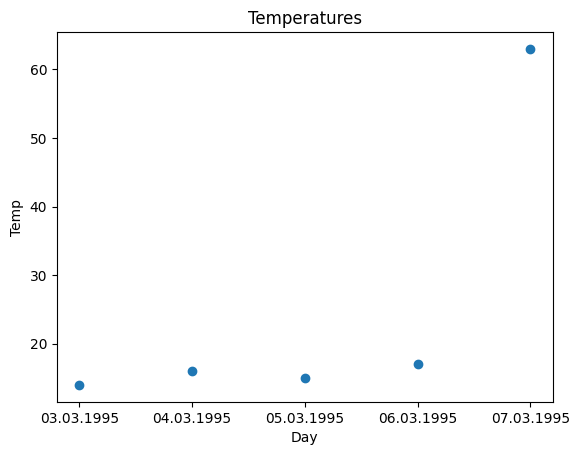

In [276]:
import matplotlib.pyplot as plt
plt.scatter(x = 'date', y ='temp', data = df12)
plt.title('Temperatures')
plt.xlabel("Day")
plt.ylabel("Temp")
plt.show

In [ ]:
# C = (F-32)*5/9

In [281]:
temp_fh = df12.loc[df12['temp']>40, 'temp']
temp_fh

4    63
Name: temp, dtype: int64

In [283]:
temp_cel = (temp_fh-32)*5/9
df12.loc[df12['temp']>40, 'temp']=temp_cel
df12

,date,temp
0,03.03.1995,14.000000
1,04.03.1995,16.000000
2,05.03.1995,15.000000
3,06.03.1995,17.000000
4,07.03.1995,17.222222


In [284]:
assert df12['temp'].max()<40

In [298]:
df13= pd.DataFrame({'date': ['March 3rd, 1995','04.03.1995','05/03/1995','27.27.1995','03.23.1995'],
                   'temp':[14,16,15,17,63]})
df13

,date,temp
0,"March 3rd, 1995",14
1,04.03.1995,16
2,05/03/1995,15
3,27.27.1995,17
4,03.23.1995,63


In [295]:
# will make error due to 27.27.1995
df13['date1']= pd.to_datetime(df13['date'])
df13

C:\Users\AsusF512ua-ej269t\AppData\Local\Temp\ipykernel_17500\836304516.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df13['date1']= pd.to_datetime(df13['date'])


,date,temp,date1
0,"March 3rd, 1995",14,1995-03-03
1,04.03.1995,16,1995-04-03
2,05/03/1995,15,1995-05-03
3,27.03.1995,17,1995-03-27
4,03.23.1995,63,1995-03-23


In [299]:
# will work
df13['date2']= pd.to_datetime(df13['date'], 
                             # if True and no format is given, attempt to infer the format of the datetime strings based on
                              #the first non-NaN element,
                             infer_datetime_format =False,
                             # return NA where conversion failed
                             errors = 'coerce')
df13

,date,temp,date2
0,"March 3rd, 1995",14,1995-03-03
1,04.03.1995,16,1995-04-03
2,05/03/1995,15,1995-05-03
3,27.27.1995,17,NaT
4,03.23.1995,63,1995-03-23


In [301]:
df13['date3']= df13['date2'].dt.strftime('%d-%m-%y')
df13['date3']

0    03-03-95
1    03-04-95
2    03-05-95
3         NaN
4    23-03-95
Name: date3, dtype: object

# 7. Cross field validation

In [302]:
df14 =pd.DataFrame({
    'Name': ['Anna', 'Jan', 'Pawel','Emil', "Klaudia"],
    'A': [1,2,2,1,2],
    'B': [1,2,2,1,2],
    'C': [1,2,2,1,2],
    'D': [3,6,6,3,5]
})
df14

,Name,A,B,C,D
0,Anna,1,1,1,3
1,Jan,2,2,2,6
2,Pawel,2,2,2,6
3,Emil,1,1,1,3
4,Klaudia,2,2,2,5


In [303]:
sum_class = df14[['A', 'B', 'C']].sum(axis =1)
sum_class

0    3
1    6
2    6
3    3
4    6
dtype: int64

In [307]:
equel =sum_class == df14['D']
equel

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [310]:
correct = df14[equel]
correct

,Name,A,B,C,D
0,Anna,1,1,1,3
1,Jan,2,2,2,6
2,Pawel,2,2,2,6
3,Emil,1,1,1,3


In [311]:
incorrect = df14[~equel]
incorrect

,Name,A,B,C,D
4,Klaudia,2,2,2,5


In [314]:
df15 =pd.DataFrame({
    'Name': ['Anna', 'Jan', 'Pawel','Emil', "Klaudia"],
    'Age': [20,25,30,35,35],
    'Birthday': ['2004-01-01','1999-01-01','1994-01-01','1989-01-01','1999-01-01',]
})
df15

,Name,Age,Birthday
0,Anna,20,2004-01-01
1,Jan,25,1999-01-01
2,Pawel,30,1994-01-01
3,Emil,35,1989-01-01
4,Klaudia,35,1999-01-01


In [315]:
df15['Birthday'] = pd.to_datetime(df15['Birthday'])
today = dt.date.today()

In [316]:
age_manula = today.year -df15['Birthday'].dt.year

In [317]:
equel =age_manula == df15['Age']
equel

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [318]:
correct = df15[equel]
correct

,Name,Age,Birthday
0,Anna,20,2004-01-01
1,Jan,25,1999-01-01
2,Pawel,30,1994-01-01
3,Emil,35,1989-01-01


In [319]:
incorrect = df15[~equel]
incorrect

,Name,Age,Birthday
4,Klaudia,35,1999-01-01


# 8. Comparing strings

### a. Minimum edit distance
- nltk
- thefuzz
- textdistance

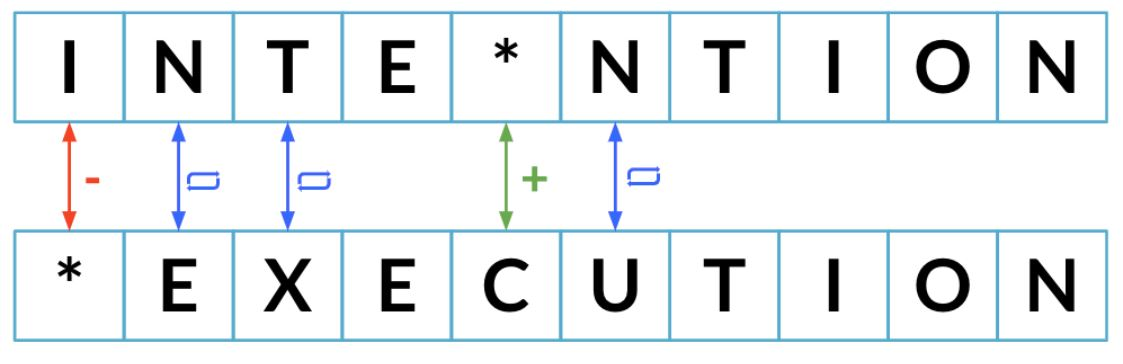

In [345]:
from PIL import Image 
from IPython.display import display
img = Image. open('edit.jpg')display(img)

In [358]:
from thefuzz import fuzz

# compute similarity
fuzz.WRatio('Reeding', 'Reading')
# score 0-100

86

In [426]:
from thefuzz import process

string = 'Houston Rockets vs Los Angeles Lakers'
choice = pd.Series(['Rockets vs Lakers','Lakers vs Rockets', 'Houston vs Los Angeles', 'Heat vs Bulls'])

# how many strings has to compare = limit, shows the highest score
g = process.extract(string, choice, limit =2)
#("text", score, index of array

In [430]:
c=g[1]
c

('Lakers vs Rockets', 86, 1)

In [431]:
c[1]

86

In [416]:
df17 =pd.DataFrame({
    'text': ['striNg', 'string2', 'String2','strings', "string2", 'newYorkk', 'newYork', 'string', 'New York']})

In [417]:
df17['text'].unique()

array(['striNg', 'string2', 'String2', 'strings', 'newYorkk', 'newYork',
       'string', 'New York'], dtype=object)

In [418]:
categories2 = pd.DataFrame({'State':['String', 'New York']})
categories2

,State
0,String
1,New York


In [432]:
for state in categories2['State']:
    matches = process.extract(state, df17['text'], limit =df17.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df17.loc[df17['text']==potential_match[0],'text'] =state

In [434]:
len(df17.text)

9

In [477]:
df17

,text
0,String
1,String
2,String
3,String
4,String
5,New York
6,New York
7,String
8,New York


### b. Record linkage
Record linkage is the act of linking data from different sources regarding the same entity. 

In [565]:
df18 =pd.DataFrame({
    'Index': [0,1,2,3,4],
    'Name': ['Anna', 'Jan', 'Pawel','Sonia', "Klaudia"],
    'Age': [20,25,30,35,35],
    'Birthday': ['2004-01-01','1999-01-01','1994-01-01','1989-01-01','1999-01-01']
} )
df19 =pd.DataFrame({'Index': [5,6,7,8,9],
    'Name': ['Anna', 'Gabi', 'Diwa','Emil', "Klaudia"],
    'Age': [20,30,30,35,35],
    'Birthday': ['2004-01-01','1994-01-01','1994-01-01','1989-01-01','1999-01-01']
})

df18.set_index('Index', inplace=True)
df19.set_index('Index', inplace=True)


# df18 = pd.DataFrame({
#     'Index': [0, 1, 2, 3, 4],
#     'Name': ['Anna', 'Jan', 'Pawel', 'Sonia', 'Klaudia'],
#     'Age': [20, 25, 30, 35, 35],
#     'Birthday': ['2004-01-01', '1999-01-01', '1994-01-01', '1989-01-01', '1999-01-01']
# })

# df19 = pd.DataFrame({
#     'Index': [0, 1, 2, 3, 4],
#     'Name': ['Anna', 'Gabi', 'Diwa', 'Emil', 'Klaudia'],
#     'Age': [20, 30, 30, 35, 35],
#     'Birthday': ['2004-01-01', '1994-01-01', '1994-01-01', '1989-01-01', '1999-01-01']
# })

In [560]:
df19


,Name,Age,Birthday
Index,,,
5,Anna,20,2004-01-01
6,Gabi,30,1994-01-01
7,Diwa,30,1994-01-01
8,Emil,35,1989-01-01
9,Klaudia,35,1999-01-01


In [561]:
df18.index

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='Index')

In [570]:
import recordlinkage

indexer = recordlinkage.Index()
indexer.block('Age')
pairs = indexer.index(df18,df19)

compare_cl = recordlinkage.Compare()

# Exact matches
compare_cl.exact('Birthday', 'Birthday', label = 'Birthday')
# Similar matches
compare_cl.string('Name', 'Name', threshold  = 0.85, label = 'Name')

potential_matches = compare_cl.compute(pairs, df18, df19)

In [571]:
# multiindex object
matches = potential_matches[potential_matches.sum(axis=1)==2]

In [574]:
# get_level_values method, which takes in which column index we want to extract its values
#(0)from df18, (1)from df19, can be used the name too (df19)
duplicated_rows = matches.index.get_level_values(1)

# duplicates in df19
df19_duplicates = df19[df19.index.isin(duplicated_rows)]

# not duplicateed in df19
df19_new = df19[~df19.index.isin(duplicated_rows)]

full_df = df18.append(df19_new)
full_df

C:\Users\AsusF512ua-ej269t\AppData\Local\Temp\ipykernel_17500\2124186537.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_df = df18.append(df19_new)


,Name,Age,Birthday
Index,,,
0,Anna,20,2004-01-01
1,Jan,25,1999-01-01
2,Pawel,30,1994-01-01
3,Sonia,35,1989-01-01
4,Klaudia,35,1999-01-01
6,Gabi,30,1994-01-01
7,Diwa,30,1994-01-01
8,Emil,35,1989-01-01


# 9. Training and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

### Stratified sampling
- dataset of 100 samples: 80 class 1, 20 class 2
- training set 75 samples:  60 class 1, 15 class 2
- text set 25 samples:  20 class 1, 5 class 2

In [ ]:
# stratify = y
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=21)

In [49]:
volunteer['category_desc'].value_counts()

Strengthening Communities    307
Helping Neighbors in Need    119
Education                     92
Health                        52
Environment                   32
Emergency Preparedness        15
Name: category_desc, dtype: int64

# 10. Standardization
- linear distances(k-nearest neighbors, linear regression, k-means clustering)
- high variance
- different scales

### Log normalization
- e = 2.718
- 30 - 3.4
- 300 - 5.7
- 3000 - 8

In [55]:
df3 =pd.DataFrame({
    'A': [1, 1.2 ,0.75, 1.6],
    'B': [3, 45.5, 28, 100]
})
df3

,A,B
0,1.00,3.0
1,1.20,45.5
2,0.75,28.0
3,1.60,100.0


In [56]:
df3.var()

A       0.128958
B    1691.729167
dtype: float64

In [61]:
import numpy as np
df3["log_B"] = np.log(df3['B'])

In [62]:
df3

,A,B,log_B
0,1.00,3.0,1.098612
1,1.20,45.5,3.817712
2,0.75,28.0,3.332205
3,1.60,100.0,4.605170


In [63]:
df3.var()

A           0.128958
B        1691.729167
log_B       2.262886
dtype: float64

# 11. Scaling data for feature comparison
- mean = 0
- variance = 1

In [65]:
df4 =pd.DataFrame({
    'A': [1, 1.2, 0.75, 1.6],
    'B': [48, 45.5, 46.2, 50],
    'C': [100, 101.3, 103.5, 104]
})
df4

,A,B,C
0,1.00,48.0,100.0
1,1.20,45.5,101.3
2,0.75,46.2,103.5
3,1.60,50.0,104.0


In [66]:
df4.var()

A    0.128958
B    4.055833
C    3.526667
dtype: float64

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df4), columns = df4.columns)
df_scaled

,A,B,C
0,-0.442127,0.329683,-1.352726
1,0.200967,-1.103723,-0.553388
2,-1.245995,-0.702369,0.799338
3,1.487156,1.476409,1.106776


In [69]:
df_scaled.var()

A    1.333333
B    1.333333
C    1.333333
dtype: float64

# 12. Standardized data and modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify = y, random_state=21)
knn = KNeighborsClassifier()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

# 13. Feature engineering

## a. Encoding categorical variables

In [5]:
df5 =pd.DataFrame({
    'subscribed': ['y', 'n', 'n', 'y'],
    'fav_col': ['blue', 'green', 'orange', 'green']
})
df5

,subscribed,fav_col
0,y,blue
1,n,green
2,n,orange
3,y,green


In [6]:
df5['subscribed']

0    y
1    n
2    n
3    y
Name: subscribed, dtype: object

In [7]:
df5['sub_encoded'] = df5['subscribed'].apply(lambda val: 1 if val == 'y' else 0)

In [9]:
df5[['subscribed', 'sub_encoded']]

,subscribed,sub_encoded
0,y,1
1,n,0
2,n,0
3,y,1


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df5['fav_col_encoded'] = le.fit_transform(df5['fav_col'])

In [11]:
df5[['fav_col', 'fav_col_encoded']]

,fav_col,fav_col_encoded
0,blue,0
1,green,1
2,orange,2
3,green,1


In [116]:
len(df5["fav_col"].unique())

3

## b. One-hot encoding

In [14]:
ohe = pd.get_dummies(df5['fav_col'])
ohe

,blue,green,orange
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0


In [117]:
df_con = pd.concat([df5, ohe], axis=1)
df_con

,subscribed,fav_col,sub_encoded,fav_col_encoded,blue,green,orange
0,y,blue,1,0,1,0,0
1,n,green,0,1,0,1,0
2,n,orange,0,2,0,0,1
3,y,green,1,1,0,1,0


## c. Aggregate statistics

In [15]:
df6 =pd.DataFrame({
    'city': ['NYC', 'SF', 'LA', 'Boston'],
    'day1': [1,2,3,4],
    'day2': [2,4,6,5],
    'day3': [2,1,3,2]
})
df6

,city,day1,day2,day3
0,NYC,1,2,2
1,SF,2,4,1
2,LA,3,6,3
3,Boston,4,5,2


In [16]:
df6['avg'] = df6.loc[:,'day1':'day3'].mean(axis = 1)
df6

,city,day1,day2,day3,avg
0,NYC,1,2,2,1.666667
1,SF,2,4,1,2.333333
2,LA,3,6,3,4.000000
3,Boston,4,5,2,3.666667


In [177]:
df7 =pd.DataFrame({
    'date': ['July 30 2011', 'February 28 2011', 'January 30 2011', 'March 30 2011',],
    'purchase': [1,2,3,4]
})
df7

,date,purchase
0,July 30 2011,1
1,February 28 2011,2
2,January 30 2011,3
3,March 30 2011,4


In [178]:
df7['date_converte'] = pd.to_datetime(df7['date'])
df7

,date,purchase,date_converte
0,July 30 2011,1,2011-07-30
1,February 28 2011,2,2011-02-28
2,January 30 2011,3,2011-01-30
3,March 30 2011,4,2011-03-30


In [179]:
df7['month'] = df7['date_converte'].dt.month
df7

,date,purchase,date_converte,month
0,July 30 2011,1,2011-07-30,7
1,February 28 2011,2,2011-02-28,2
2,January 30 2011,3,2011-01-30,1
3,March 30 2011,4,2011-03-30,3


In [180]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4 non-null      object        
 1   purchase       4 non-null      int64         
 2   date_converte  4 non-null      datetime64[ns]
 3   month          4 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 260.0+ bytes


In [181]:
import datetime as dt
today = dt.date.today()
today

datetime.date(2024, 6, 7)

In [182]:
df7['date_converte'] = pd.to_datetime(df7['date_converte']).dt.date
df7.info()
df7[df7['date_converte']< dt.date.today()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4 non-null      object
 1   purchase       4 non-null      int64 
 2   date_converte  4 non-null      object
 3   month          4 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 260.0+ bytes


,date,purchase,date_converte,month
0,July 30 2011,1,2011-07-30,7
1,February 28 2011,2,2011-02-28,2
2,January 30 2011,3,2011-01-30,1
3,March 30 2011,4,2011-03-30,3


## e. Engineering text features
- \d+ - as many as possible digits
- \. - want to grab '.'

In [25]:
import re
my_string = "temperature: 75.6 F "
temp = re.search("\d+\.\d+", my_string)

In [28]:
float(temp.group(0))

75.6

In [ ]:
# Write a pattern to extract numbers and decimals
def return_mileage(length):
    
    # Search the text for matches
    mile = re.search("\d+\.\d+", length)
    
    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return float(mile.group(0))
        
# Apply the function to the Length column and take a look at both columns
hiking["Length_num"] = hiking["Length"].apply(return_mileage)
print(hiking[["Length", "Length_num"]].head())

### Vectorizing text
- tf/idf - how important a word is in a document beyond how frequently it occurs. 
- tf - term frequency 
- idf - inverse document frequency and places the weight on words that are ultimately more significant in the entire corpus of words.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

document =pd.DataFrame({
    'number': [1,2,3,4,5],
    'text': ['Now that, is, his', 'we have a vectorized', 'version of the text','we can use it', 'for classification.'],
    'class':[1,2,1,2,1]
})
document.head()

,number,text,class
0,1,"Now that, is, his",1
1,2,we have a vectorized,2
2,3,version of the text,1
3,4,we can use it,2
4,5,for classification.,1


In [76]:
document.iloc[:,0:2]

,number,text
0,1,"Now that, is, his"
1,2,we have a vectorized
2,3,version of the text
3,4,we can use it
4,5,for classification.


In [77]:
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(document['text'])
text_tfidf.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.5       , 0.        , 0.5       , 0.        , 0.        ,
        0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.61418897, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.61418897, 0.        ,
        0.49552379],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5       , 0.5       ,
        0.        , 0.5       , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.52335825, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.52335825, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.52335825, 0.        , 0.        ,
        0.42224214],
       [0.        , 0.70710678, 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
y = document["class"]
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y, random_state=42)

# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the model's accuracy
print(nb.score(X_test, y_test))

0.5


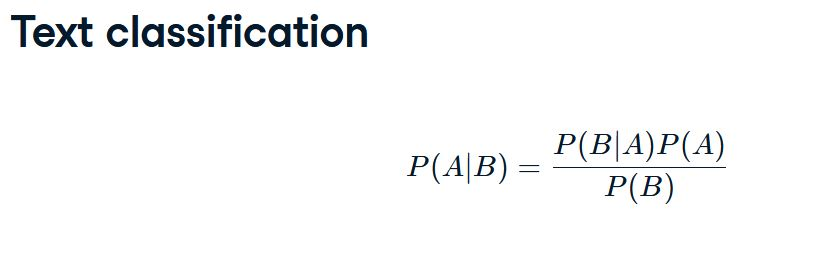

In [37]:
from PIL import Image 
from IPython.display import display
img = Image. open('bayes.jpg')
display(img)

## f. Feature selection
- reducing noise
- features are strongly correlated
- reduce overall variance
- removing redundant features
- removing correlated features
- removing duplicated features

In [11]:
df4 =pd.DataFrame({
    'A': [1, 1.2, 0.75, 1.6],
    'B': [48, 45.5, 46.2, 50],
    'C': [100, 101.3, 103.5, 104]
})
df4.corr()

,A,B,C
A,1.000000,0.675806,0.28421
B,0.675806,1.000000,0.30936
C,0.284210,0.309360,1.00000


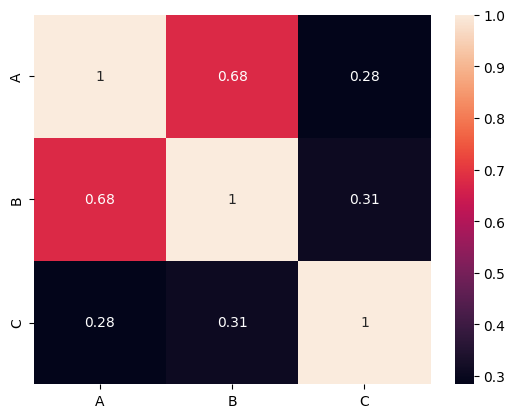

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df4.corr(), annot= True)
plt.show()
# Setting the annot argument to True labels the correlation coefficient inside each cell

## g. Selecting features using text vectors

In [80]:
tfidf_vec.vocabulary_

{'now': 7,
 'that': 10,
 'is': 5,
 'his': 4,
 'we': 15,
 'have': 3,
 'vectorized': 13,
 'version': 14,
 'of': 8,
 'the': 11,
 'text': 9,
 'can': 0,
 'use': 12,
 'it': 6,
 'for': 2,
 'classification': 1}

In [85]:
# to reverse indices with word
vocab = {v:k for k, v in 
        tfidf_vec.vocabulary_.items()}
vocab

{7: 'now',
 10: 'that',
 5: 'is',
 4: 'his',
 15: 'we',
 3: 'have',
 13: 'vectorized',
 14: 'version',
 8: 'of',
 11: 'the',
 9: 'text',
 0: 'can',
 12: 'use',
 6: 'it',
 2: 'for',
 1: 'classification'}

In [82]:
# "we can use it"
text_tfidf[3].data # of 4th row
# the word weights

array([0.52335825, 0.52335825, 0.52335825, 0.42224214])

In [83]:
text_tfidf[3].indices # of 4th row
# and the index of the word.

array([ 6, 12,  0, 15])

In [86]:
zipped_row = dict(zip(text_tfidf[3].indices,text_tfidf[3].data))
zipped_row

{6: 0.5233582502695435,
 12: 0.5233582502695435,
 0: 0.5233582502695435,
 15: 0.4222421409859579}

In [88]:
def return_weight(vocab, vector, vector_index):
    zipped = dict(zip(text_tfidf.indices,text_tfidf.data))
    return {vocab[i]:zipped[i] for i in vector[vector_index].indices}

In [89]:
print(return_weight(vocab,text_tfidf, 3))

{'it': 0.5233582502695435, 'use': 0.5233582502695435, 'can': 0.5233582502695435, 'we': 0.4222421409859579}


In [105]:
# number of indexes of  n top words

# Add in the rest of the arguments
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    
    # Transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
    # Sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    return [original_vocab[i] for i in zipped_index]

# Print out the weighted words
print(return_weights(vocab, tfidf_vec.vocabulary_, text_tfidf, 3, 3))

[6, 12, 0]


In [107]:
# top words from each document in the text vector, return a list of the word indices, 
# and use that list to filter the text vector down to those top words

def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):
    
        # Call the return_weights function and extend filter_list
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
        
    # Return the list in a set, so we don't get duplicate word indices
    return set(filter_list)

# Call the function to get the list of word indices
filtered_words = words_to_filter(vocab, tfidf_vec.vocabulary_, text_tfidf, 3)

# Filter the columns in text_tfidf to only those in filtered_words
filtered_text = text_tfidf[:, list(filtered_words)]
filtered_text.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.61418897, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.61418897, 0.49552379],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.        ,
        0.5       , 0.        , 0.        , 0.        ],
       [0.52335825, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.52335825, 0.        , 0.        , 0.        ,
        0.        , 0.52335825, 0.        , 0.42224214],
       [0.        , 0.70710678, 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

## h. Dimensionality reduction
- linear and not linear fasion

In [97]:
from sklearn.decomposition import PCA
df4 =pd.DataFrame({
    'A': [1, 1.2, 0.75, 1.6],
    'B': [48, 45.5, 46.2, 50],
    'C': [100, 101.3, 103.5, 104]
})
model_PCA = PCA()
PCA_df4 = model_PCA.fit_transform(df4)
PCA_df4

array([[-0.91997384,  2.07707784, -0.17007951],
       [-2.05176513, -0.46784872,  0.30151067],
       [-0.19557782, -1.79841496, -0.26121678],
       [ 3.16731679,  0.18918585,  0.12978562]])

In [101]:
model_PCA.explained_variance_ratio_

array([0.65384253, 0.3372999 , 0.00885757])

In [102]:
round(model_PCA.explained_variance_ratio_.sum(),2)

1.0

# SUM UP - UFOs and preprocessing

In [110]:
ufo = pd.read_csv('data/ufo_sightings_large.csv')

In [111]:
# Print the DataFrame info
print(ufo.info())

# Change the type of seconds to float
ufo["seconds"] = ufo["seconds"].astype('float')

# Change the date column to type datetime
ufo["date"] = ufo["date"].astype('datetime64')

# Check the column types
print(ufo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4935 non-null   object 
 1   city            4926 non-null   object 
 2   state           4516 non-null   object 
 3   country         4255 non-null   object 
 4   type            4776 non-null   object 
 5   seconds         4935 non-null   float64
 6   length_of_time  4792 non-null   object 
 7   desc            4932 non-null   object 
 8   recorded        4935 non-null   object 
 9   lat             4935 non-null   object 
 10  long            4935 non-null   float64
dtypes: float64(2), object(9)
memory usage: 424.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4935 non-null   d

In [112]:
print(ufo[['length_of_time', 'state', 'type']].isna().sum())

# Drop rows where length_of_time, state, or type are missing
ufo_no_missing = ufo.dropna(subset = ['length_of_time', 'state', 'type'])

# Print out the shape of the new dataset
print(ufo_no_missing.shape)

length_of_time    143
state             419
type              159
dtype: int64
(4283, 11)


In [ ]:
# Categorical variables and standardization
def return_minutes(time_string):

    # Search for numbers in time_string
    num = re.search("\d+", time_string)
    if num is not None:
        return int(num.group(0))
        
# Apply the extraction to the length_of_time column
ufo["minutes"] = ufo["length_of_time"].apply(lambda row: return_minutes(row))

# Take a look at the head of both of the columns
print(ufo[['length_of_time','minutes']].head())

In [119]:
# Tdf

# Take a look at the head of the desc field
print(ufo['desc'].head())

ufo['desc'] = ufo['desc'].fillna(' ')

# Instantiate the tfidf vectorizer object
vec = TfidfVectorizer()

# Fit and transform desc using vec
desc_tfidf = vec.fit_transform(ufo['desc'])

# Look at the number of columns and rows
print(desc_tfidf.shape)

0    Red blinking objects similar to airplanes or s...
1                 Many fighter jets flying towards UFO
2    Green&#44 red&#44 and blue pulses of light tha...
3    It was a large&#44 triangular shaped flying ob...
4       A white spinning disc in the shape of an oval.
Name: desc, dtype: object
(4935, 6433)
